In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
df=pd.read_csv("personality_dataset.csv")
    # - Time_spent_Alone: Hours spent alone daily (0–11).
    # - Stage_fear: Presence of stage fright (Yes/No).
    # - Social_event_attendance: Frequency of social events (0–10).
    # - Going_outside: Frequency of going outside (0–7).
    # - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    # - Friends_circle_size: Number of close friends (0–15).
    # - Post_frequency: Social media post frequency (0–10).
    # - Personality: Target variable (Extrovert/Introvert).

In [56]:
#Data Cleaning
df[['Stage_fear', 'Drained_after_socializing']] = df[['Stage_fear', 'Drained_after_socializing']].map(
    lambda x: 1 if str(x).lower() == 'yes' else 0
)

df['Personality'] = df['Personality'].map(
    lambda x: 1 if str(x).lower() == 'extrovert' else 0
)

In [57]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [58]:
scaler = StandardScaler()
df2=df
# Identify columns to scale
cols_to_scale = df2.columns.drop('Personality')

# Scale those columns
df_scaled = df2.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

print(df_scaled)

      Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0            -0.147014   -0.972784                 0.012759       1.350613   
1             1.306226    1.027977                -1.379944      -1.350613   
2             1.306226    1.027977                -1.031768      -0.450204   
3            -1.309607   -0.972784                 0.709111       1.800817   
4            -0.437663   -0.972784                 1.753638       0.450204   
...                ...         ...                      ...            ...   
2895         -0.437663   -0.972784                 1.057286       1.350613   
2896         -0.437663   -0.972784                 1.405462       0.000000   
2897         -0.147014    1.027977                -1.031768      -0.900408   
2898          1.887522    1.027977                -1.031768       0.000000   
2899         -0.437663   -0.972784                 0.709111       1.350613   

      Drained_after_socializing  Friends_circle_size  Post_freq

In [59]:
# Example: assume df_scaled exists, with 'Personality' as target
X = df_scaled.drop('Personality', axis=1)
y = df_scaled['Personality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9190


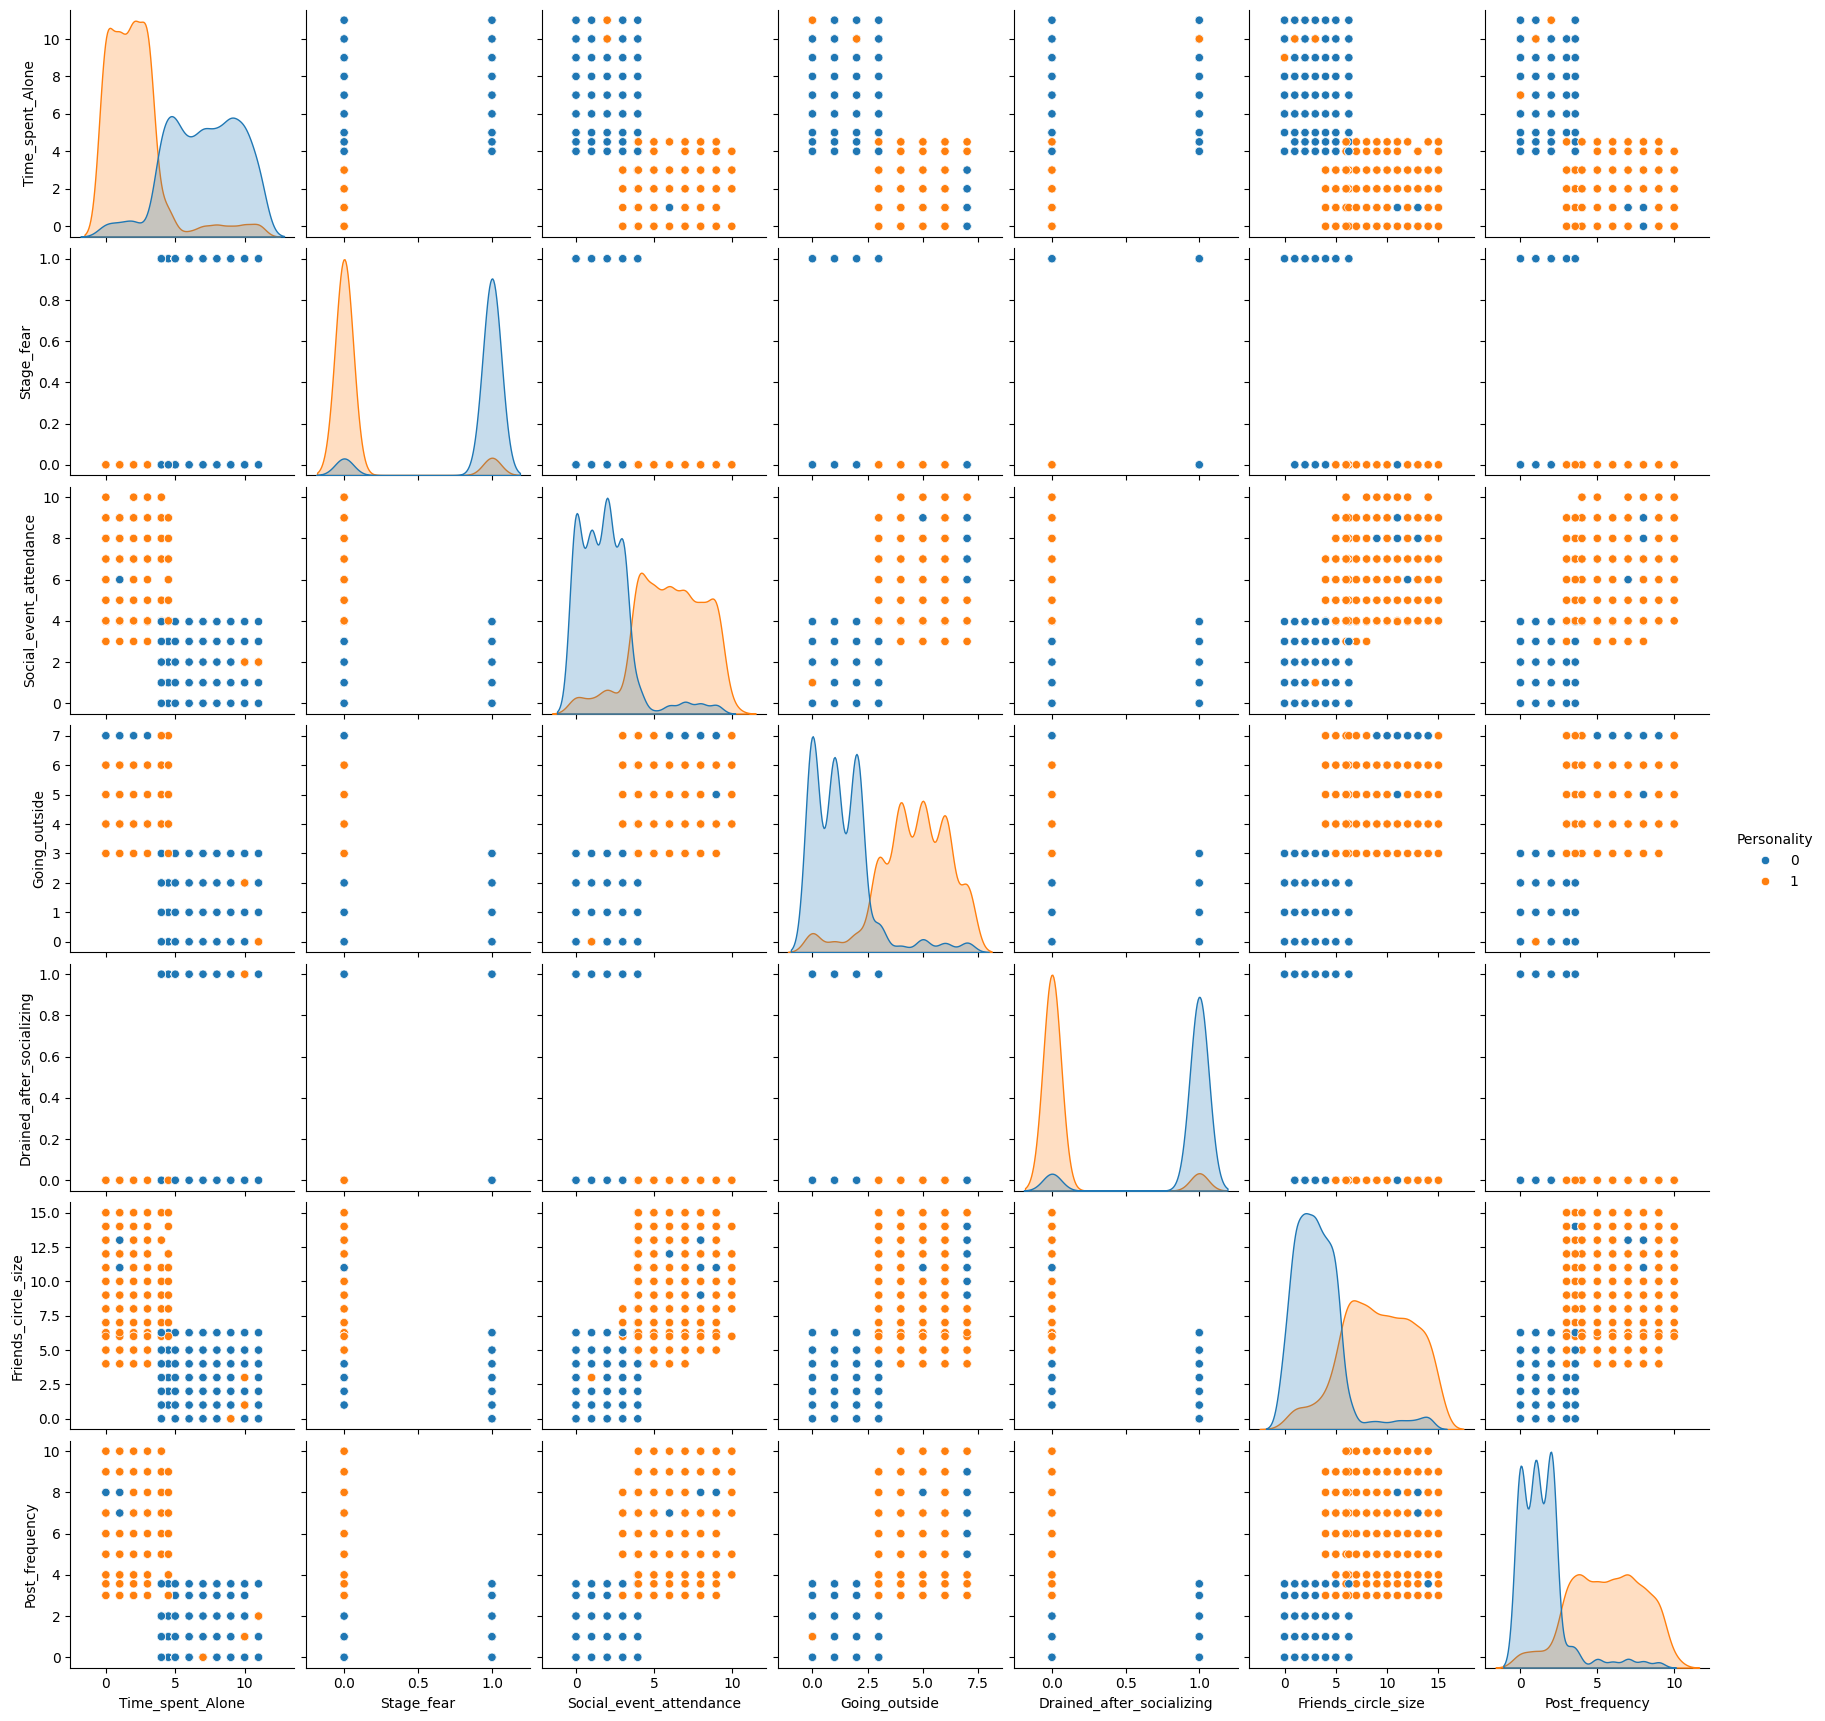

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Personality')
plt.show()

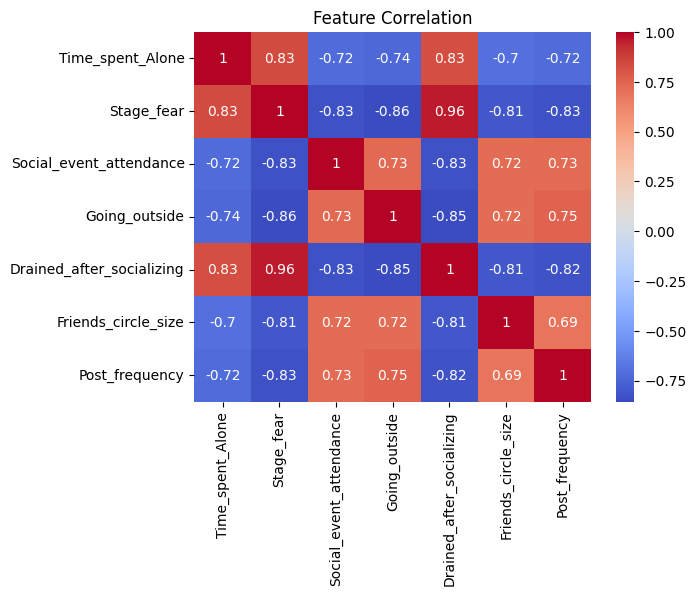

In [61]:
sns.heatmap(df.drop('Personality', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

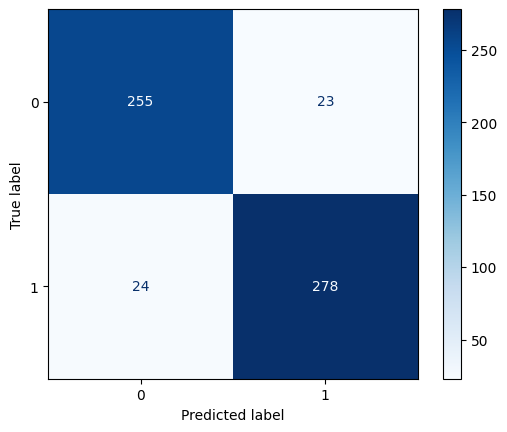

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()